# <span style="color:lightblue"><center> **ANÁLISE EXPLORATÓRIA DOS DADOS**</center></span>

---
## Limpeza dos Dados
---

### Importação das Bibliotecas

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap

In [201]:
# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

### Carregamento dos Dados

In [202]:
df_raw = pd.read_csv('..\data\dados_brutos\liver_cirrhosis.csv')
df_raw

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


* Os dados vieram  do arquivo csv obtido do Kaggles e foram convertidos para um dataframe do Pandas para iniciar a manipulação.

### Tradução das Colunas e Termos

In [203]:
#Traduzindo os nomes das colunas

# Tradução das colunas
traducao = {
    'N_Days': 'Numero_dias',# ate um transplante ou morte ou fim do estudo
    'Status': 'Situação', #se o paciente foi transplantado(CL), morreu(D) ou sobreviveu(C)
    'Drug': 'Droga',
    'Age': 'Idade',
    'Sex': 'Sexo',
    'Ascites': 'Ascite', #acumulo de liquido no abdome
    'Hepatomegaly': 'Hepatomegalia',
    'Spiders': 'Telangiectasia', #pequenos vasos sanguíneos dilatados
    'Edema': 'Edema', #inchaço
    'Bilirubin': 'Bilirrubina(mg/dl)', #miligramas por decilitro
    'Cholesterol': 'Colesterol(mg/dl)', #miligramas por decilitro
    'Albumin': 'Albumina(gm/dl)', #gramas por decilitro
    'Copper': 'Cobre_Urina(ug/dia)', #microgramas por dia
    'Alk_Phos': 'Fosfatase_Alcalina (U/L)', #unidades por litro
    'SGOT': 'Aspartato_Aminotransferase(U/L)', #unidades por litro
    'Tryglicerides': 'Triglicerídeos(mg/dl)', #miligramas por decilitro
    'Platelets': 'Plaquetas(ml/1000)', #numero de plaquetas por milimetro cubico
    'Prothrombin': 'Tempo_de_Protrombina(s)', #segundos
    'Stage': 'Estágio'
}

# Renomear as colunas
df_raw.rename(columns=traducao, inplace=True)

df_raw.head()

,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


* Para melhor compreensão, foi necessária a tradução e simplificação de determinados nomes de colunas do dataframe, além da adição de unidades para tipos numéricos. As traduções resultaram em:

    - `N_Days`: Número de dias até um transplante, morte ou fim do estudo.
    - `Status`: Situação do paciente, se foi transplantado (CL), morreu (D) ou sobreviveu (C).
    - `Drug`: Droga administrada.
    - `Age`: Idade do paciente.
    - `Sex`: Sexo do paciente.
    - `Ascites`: Acúmulo de líquido no abdômen.
    - `Hepatomegaly`: Hepatomegalia.
    - `Spiders`: Telangiectasia, pequenos vasos sanguíneos dilatados.
    - `Edema`: Inchaço.
    - `Bilirubin`: Bilirrubina (mg/dl).
    - `Cholesterol`: Colesterol (mg/dl).
    - `Albumin`: Albumina (gm/dl).
    - `Copper`: Cobre na urina (ug/dia).
    - `Alk_Phos`: Fosfatase Alcalina (U/L), unidades por litro.
    - `SGOT`: Aspartato Aminotransferase (U/L), unidades por litro.
    - `Tryglicerides`: Triglicerídeos (mg/dl).
    - `Platelets`: Plaquetas (ml/1000), número de plaquetas por milímetro cúbico.
    - `Prothrombin`: Tempo de Protrombina (s), segundos.
    - `Stage`: Estágio da cirrose biliar primária.

In [204]:
#Tradução de alguns termos na tabela

traducao = {
    'D-penicillamine': 'D-penicilamina',
    'Y': 'S',
    'N': 'N',
    'C': 'Sobreviveu',
    'D': 'Morte',
    'CL': 'Transplante'
}

df_raw = df_raw.replace(traducao)
df_raw.head()


,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,Sobreviveu,Placebo,18499,F,N,S,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,Sobreviveu,Placebo,19724,M,S,N,S,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Sobreviveu,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Morte,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Morte,Placebo,21699,F,N,S,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


* Além disso, também houve a substituição de alguns termos:

    - `D-penicillamine`: `D-penicilamina`
    - `Y`: `S`
    - `N`: `N`
    - `C`: `Sobreviveu`
    - `D`: `Morte`
    - `CL`: `Transplante`

### Retirada de Duplicatas

In [205]:
#Removendo linhas duplicadas
linhas_duplicadas = df_raw[df_raw.duplicated()]
#print(linhas_duplicadas)
print(len(df_raw))


df = df_raw.drop_duplicates()
linhas_duplicadas = df[df.duplicated()]
print(len(df))

print(df.dtypes)

25000
9637
Numero_dias                          int64
Situação                            object
Droga                               object
Idade                                int64
Sexo                                object
Ascite                              object
Hepatomegalia                       object
Telangiectasia                      object
Edema                               object
Bilirrubina(mg/dl)                 float64
Colesterol(mg/dl)                  float64
Albumina(gm/dl)                    float64
Cobre_Urina(ug/dia)                float64
Fosfatase_Alcalina (U/L)           float64
Aspartato_Aminotransferase(U/L)    float64
Triglicerídeos(mg/dl)              float64
Plaquetas(ml/1000)                 float64
Tempo_de_Protrombina(s)            float64
Estágio                              int64
dtype: object


In [206]:
df

,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,Sobreviveu,Placebo,18499,F,N,S,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1230,Sobreviveu,Placebo,19724,M,S,N,S,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,4184,Sobreviveu,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,2090,Morte,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,Morte,Placebo,21699,F,N,S,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,Sobreviveu,Placebo,17897,F,S,N,S,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
24971,4795,Sobreviveu,Placebo,23376,F,S,N,S,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
24972,3358,Morte,D-penicilamina,24585,F,N,S,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
24991,4365,Sobreviveu,D-penicilamina,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


* Na documentação do dataset foi apontado que houveram inserções de dados sintéticos seguindo o modelo de distribuição dos dados originais, esse processo causou muitas linhas de dados duplicados. Nessa etapa foi utilizado o comando `drop_duplicates()` para manter apenas uma ocorrência dessas linhas.

### Criação dos Arquivos CSV

In [207]:
#Criação do CSV com colunas completas

import os

pasta = '../data/dados_processados'
arquivo = 'liver_cirrhosis_v1.csv'
caminho_arquivo = os.path.join(pasta, arquivo)

#Verifica se a pasta existe, se não, cria a pasta
if not os.path.exists(pasta):
    os.makedirs(pasta)

#Verifica se o arquivo já existe, se existir, remove
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)

#Salva o DataFrame como um arquivo CSV
df.to_csv(caminho_arquivo, index=False)

print(f'O arquivo {arquivo} foi salvo na pasta {pasta}.')

O arquivo liver_cirrhosis_v1.csv foi salvo na pasta ../data/dados_processados.


In [208]:
# Criação do Arquivo CSV com apenas colunas de Sintomas + Estagios (Prever Estagio)

colunas_desejadas = [
    'Ascite', 'Hepatomegalia', 'Telangiectasia', 'Edema', 'Bilirrubina(mg/dl)',
    'Colesterol(mg/dl)', 'Albumina(gm/dl)', 'Cobre_Urina(ug/dia)',
    'Fosfatase_Alcalina (U/L)', 'Aspartato_Aminotransferase(U/L)',
    'Triglicerídeos(mg/dl)', 'Plaquetas(ml/1000)', 'Tempo_de_Protrombina(s)', 'Estágio'
]

df_selecionado = df[colunas_desejadas]
print(df_selecionado)


      Ascite Hepatomegalia Telangiectasia Edema  Bilirrubina(mg/dl)  \
0          N             S              N     N                 0.5   
1          S             N              S     N                 0.5   
2          N             N              N     N                 0.5   
3          N             N              N     N                 0.7   
4          N             S              N     N                 1.9   
...      ...           ...            ...   ...                 ...   
24963      S             N              S     N                 0.7   
24971      S             N              S     N                 1.8   
24972      N             S              N     N                 2.1   
24991      N             N              N     N                 0.9   
24992      S             S              S     N                 0.8   

       Colesterol(mg/dl)  Albumina(gm/dl)  Cobre_Urina(ug/dia)  \
0             149.000000             4.04           227.000000   
1             2

In [209]:
# Salvando o csv v2
pasta = '../data/dados_processados'
arquivo = 'liver_cirrhosis_v2.csv'
caminho_arquivo = os.path.join(pasta, arquivo)

#Verifica se a pasta existe, se não, cria a pasta
if not os.path.exists(pasta):
    os.makedirs(pasta)

#Verifica se o arquivo já existe, se existir, remove
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)

#Salva o DataFrame como um arquivo CSV
df_selecionado.to_csv(caminho_arquivo, index=False)

print(f'O arquivo {arquivo} foi salvo na pasta {pasta}.')

O arquivo liver_cirrhosis_v2.csv foi salvo na pasta ../data/dados_processados.


In [210]:
# Selecionando colunas Idade + Sintomas + Estagio + Situação (Prever evento morte, transplante ou sobrevivencia)

colunas_desejadas = [
    'Situação', 'Idade',
    'Bilirrubina(mg/dl)', # pode indicar maior mortalidade
    'Albumina(gm/dl)', #Função hepatica comprometida
    'Aspartato_Aminotransferase(U/L)', #Dano Hepático
    'Plaquetas(ml/1000)', #Complicações Hepaticas
    'Tempo_de_Protrombina(s)', #coagulação do sangue comprometida em caso de tempo prolongado
    'Estágio'
]

df_selecionado = df[colunas_desejadas]
print(df_selecionado)

         Situação  Idade  Bilirrubina(mg/dl)  Albumina(gm/dl)  \
0      Sobreviveu  18499                 0.5             4.04   
1      Sobreviveu  19724                 0.5             3.93   
2      Sobreviveu  11839                 0.5             3.54   
3           Morte  16467                 0.7             3.74   
4           Morte  21699                 1.9             3.54   
...           ...    ...                 ...              ...   
24963  Sobreviveu  17897                 0.7             3.49   
24971  Sobreviveu  23376                 1.8             3.24   
24972       Morte  24585                 2.1             3.48   
24991  Sobreviveu  21324                 0.9             3.40   
24992       Morte  28650                 0.8             2.94   

       Aspartato_Aminotransferase(U/L)  Plaquetas(ml/1000)  \
0                            52.700000               256.0   
1                            45.000000               220.0   
2                           122.4

In [211]:
# Salvando o csv v3
pasta = '../data/dados_processados'
arquivo = 'liver_cirrhosis_v3.csv'
caminho_arquivo = os.path.join(pasta, arquivo)

#Verifica se a pasta existe, se não, cria a pasta
if not os.path.exists(pasta):
    os.makedirs(pasta)

#Verifica se o arquivo já existe, se existir, remove
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)

#Salva o DataFrame como um arquivo CSV
df_selecionado.to_csv(caminho_arquivo, index=False)

print(f'O arquivo {arquivo} foi salvo na pasta {pasta}.')

O arquivo liver_cirrhosis_v3.csv foi salvo na pasta ../data/dados_processados.


* Após o pré-processamento, foram gerados 3 arquivos CSV para diferentes propósitos:

    - `liver_cirrohosis_v1.csv`: Este arquivo contém o conjunto de dados tratado e completo, com todas as colunas.
    - `liver_cirrohosis_v2.csv`: Contém apenas as colunas relacionadas a Sintomas e Estágios, destinado a prever o Estágio da cirrose.
    - `liver_cirrohosis_v3.csv`: Inclui as colunas de Idade, Estágio e Situação, com o objetivo de prever o evento de morte, transplante ou sobrevivência, além dos sintomas relevantes, tais como:
    
        - `Bilirrubina (mg/dl)`: Pode indicar maior taxa de mortalidade.
        - `Albumina (gm/dl)`: Reflete comprometimento da função hepática.
        - `Aspartato Aminotransferase (U/L)`: Indicador de dano hepático.
        - `Plaquetas (ml/1000)`: Associadas a complicações hepáticas.
        - `Tempo de Protrombina (s)`: Prolongamento indicativo de comprometimento na coagulação sanguínea.

---
## Seção 1: Análise dos dados numéricos e categóricos do dataset
---

### **Análise: Dados categóricos**

#### Importação de arquivo modificado anteriormente

In [212]:
df_cirrose = pd.read_csv("..\data\dados_processados\liver_cirrhosis_v1.csv")
df_cirrose.head()

,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,Sobreviveu,Placebo,18499,F,N,S,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,Sobreviveu,Placebo,19724,M,S,N,S,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Sobreviveu,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Morte,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Morte,Placebo,21699,F,N,S,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


#### Colunas categóricas e os valores por coluna

In [213]:
categ_columns = list(df_cirrose.select_dtypes(include=['object']).columns)
categ_columns.append('Estágio')
print("Colunas:", categ_columns)

print("\nValores por coluna categórica:\n")
for i in categ_columns:
    print(df_cirrose[i].value_counts(),"\n")

Colunas: ['Situação', 'Droga', 'Sexo', 'Ascite', 'Hepatomegalia', 'Telangiectasia', 'Edema', 'Estágio']

Valores por coluna categórica:

Situação
Sobreviveu     5325
Morte          3704
Transplante     608
Name: count, dtype: int64 

Droga
Placebo           6212
D-penicilamina    3425
Name: count, dtype: int64 

Sexo
F    8559
M    1078
Name: count, dtype: int64 

Ascite
N    6328
S    3309
Name: count, dtype: int64 

Hepatomegalia
N    5904
S    3733
Name: count, dtype: int64 

Telangiectasia
N    4959
S    4678
Name: count, dtype: int64 

Edema
N    8055
S    1582
Name: count, dtype: int64 

Estágio
2    3308
3    3304
1    3025
Name: count, dtype: int64 



* Vale ressaltar que inicialmente foi criada uma lista com o objetivo de identificar as colunas de dados categóricos. A coluna 'Estágio' foi adicionada manualmente, pois, apesar de ter tido seus dados classificados como numéricos, os dados são dados categóricos. Em seguida, são exibidos quantos pacientes cada classe em cada coluna possui.

### **Análise: Dados numéricos**

In [214]:
# Caminho dos Dados para EDA
data_path = r'..\data\dados_processados\liver_cirrhosis_v1.csv'

In [215]:
# Lendo os Dados
df = pd.read_csv(data_path)

#### Aqui, não utilizamos a última coluna, que seria a de estágio, pois ela se caracteriza como categórica

In [216]:
# Colunas numéricas
colunas_numericas = list(df.select_dtypes('number'))[:-1] #Estágio se caracteriza como categórica
colunas_numericas

['Numero_dias',
 'Idade',
 'Bilirrubina(mg/dl)',
 'Colesterol(mg/dl)',
 'Albumina(gm/dl)',
 'Cobre_Urina(ug/dia)',
 'Fosfatase_Alcalina (U/L)',
 'Aspartato_Aminotransferase(U/L)',
 'Triglicerídeos(mg/dl)',
 'Plaquetas(ml/1000)',
 'Tempo_de_Protrombina(s)']

#### **Descrição geral dos dados**

O método `.describe()` retorna estatísticas gerais das colunas numéricas. São elas:

* **média (mean):** A média da variável
* **desvio padrão (std):** Desvio padrão da varíavel
* **valor mínimo (min):** Valor mínimo encontrado da variável
* **primeiro quartil (25%)**: Indica que 25% dos dados estão abaixo do valor indicado
* **segundo quartil (50%)**: Indica que 50% dos dados estão abaixo do valor indicado
* **terceiro quartil (75%)**: Indica que 75% dos dados estão abaixo do valor indicado
* **valor máximo (max)**: Valor máximo encontrado da variável

In [284]:
#Estatísticas gerais

"""
Coluna count foi removida pois
essa estatística não é adequada para variáveis numéricas
"""

display(df[colunas_numericas].describe().drop('count', axis=0))

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
mean,1911.276123,3.228598,371.721588,3.496127,97.025914,1973.608523,122.309516,123.597732,253.791919,10.713237,50.118605
std,1093.543838,4.512662,197.841842,0.382358,73.116315,1827.226621,47.639241,55.206737,95.749689,0.922098,10.162490
min,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,26.000000
25%,1103.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,42.000000
50%,1690.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,51.000000
75%,2598.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,57.000000
max,4795.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,78.000000


### **Visualização dos Dados:**

#### Aqui, vamos criar funções de plotagem para tornar o processo mais prático ao longo da EDA

In [218]:
# Função para plotar bloxplots ao longo da EDA

def plot_boxplots(df:pd.DataFrame = None, serie_categoria:pd.Series = None, serie_alvo:pd.Series = None, min:int=0, max:int=0, legend:bool = True):

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    if (df is not None) and (serie_categoria is None) or (serie_alvo is None):
        ax.boxplot(
        df,
        labels = df.columns,
        vert=False
        )
        return ax

    else:

        if ((min != 0) and (max != 0)):
            ax2.axvspan(
                xmin=min,
                xmax=max,
                color='lightgreen',
                alpha=0.25,
                label=f'Intervalo Adequado ({min}-{max})'
                )
            if legend:
                plt.legend()

        ax2.set_yticklabels([])
        ax2.set_ylim(ax.get_ylim())

        if (serie_categoria is None) or (serie_categoria.empty):
            ax.boxplot(
                serie_alvo,
                labels=[serie_alvo.name],
                vert=False
            )
            plt.title(f'Distribuição de {serie_alvo.name}')

            return ax

        categoria_name = serie_categoria.name
        alvo_name = serie_alvo.name
        map = {categoria: i for i, categoria in enumerate(serie_categoria.unique())}

        for categoria in serie_categoria.unique():
            ax.boxplot(
                df[df[categoria_name] == categoria][alvo_name],
                positions=[map[categoria]],
                labels=[categoria],
                vert=False
            )

        plt.title(f'Distribuição de {alvo_name} por {categoria_name}')

        return ax

In [219]:
# Função para plotar histogramas ao longo da EDA

def plot_histogramas(serie_alvo: pd.Series, min: int = 0, max: int = 0, bins: int = 20):

    fig, ax = plt.subplots()
    ax.hist(serie_alvo, bins=bins, edgecolor='black', color='#1b2442')

    if ((min != 0) and (max != 0)):
        ax.axvspan(
            xmin=min,
            xmax=max,
            color='lightgreen',
            alpha=0.25,
            label=f'Intervalo Adequado ({min}-{max})'
            )
        plt.legend()

    plt.title(f'Distribuição da frequência de {serie_alvo.name}')

    return ax

#### **Boxplot´s**

O que é um boxplot?

Um boxplot é um modelo de gráfico para
analisar o resumo da distribuição
estatística de uma variável.

**Características**
* A linha central representa a mediana
* A caixa inferior é o 1º quartil e a superior é o 3º quartil
* A linha inferior é o limite inferior (valor mínimo)
* A linha superior é o limite superior, mas não o valor máximo
* Os pontos além da linha superior ou abaixo da inferior são outliers

##### **EXEMPLO:**

<Axes: >

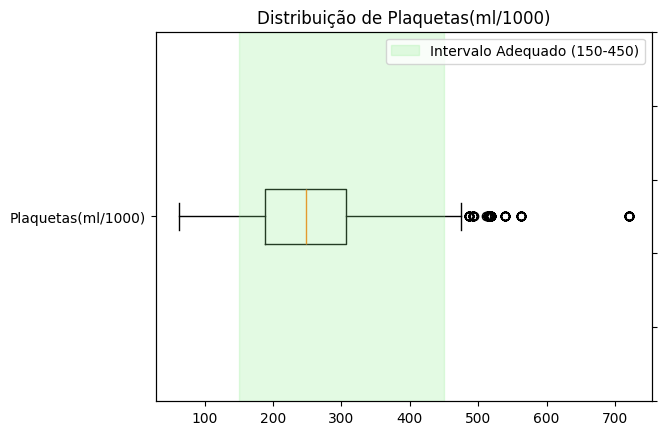

In [220]:
min_plaquetas = 150
max_plaquetas = 450
plot_boxplots(serie_alvo=df['Plaquetas(ml/1000)'], min=min_plaquetas, max=max_plaquetas)

"O valor normal da contagem de plaquetas no sangue varia de 150.000 a 450.000 plaquetas por microlitro de sangue."

<u><a href="https://www.tuasaude.com/medico-responde/valor-normal-de-plaquetas/">FONTE</a></u>

#### **Histogramas**

Um histograma é um tipo de gráfico que mostra a distribuição de uma variável contínua. Ele agrupa os dados em intervalos (bins) e conta a frequência de valores que caem em cada intervalo.

**Características**
* **Barras Verticais:** Cada barra representa um intervalo de valores (bin). A altura da barra indica a frequência (ou contagem) dos valores nesse intervalo.

* **Eixo X (Horizontal):** Mostra os intervalos de valores (bins) da variável contínua.

* **Eixo Y (Vertical):** Mostra a frequência (contagem) de valores em cada intervalo.

* **Tamanho dos Intervalos (Bins):** O número de bins pode ser ajustado para mudar a granularidade do histograma. Mais bins fornecem mais detalhes, enquanto menos bins dão uma visão mais geral.

* **Forma da Distribuição:** A forma do histograma (simétrica, enviesada à direita/esquerda, etc.) pode dar insights sobre a distribuição dos dados.

* **Áreas de Frequência Alta e Baixa:** Áreas onde as barras são altas indicam alta frequência de valores, enquanto áreas com barras baixas indicam baixa frequência.


##### **EXEMPLO:**

<Axes: title={'center': 'Distribuição da frequência de Colesterol(mg/dl)'}>

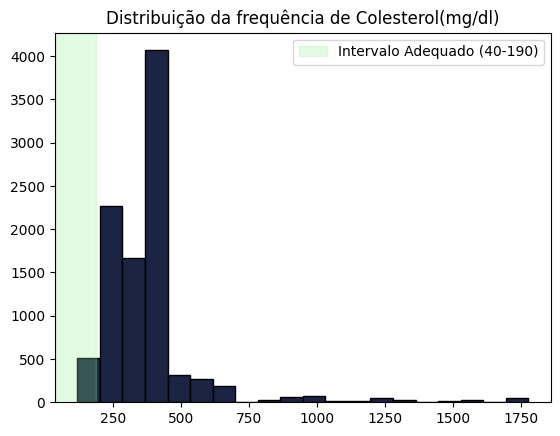

In [221]:
min_hdl = 40
max_total = 190
plot_histogramas(serie_alvo=df['Colesterol(mg/dl)'], min=min_hdl, max=max_total)

**Valor de referência para adultos maiores de 20 anos:**

"O valor de colesterol total (inclui LDL e HDL) geralmente é considerado normal quando abaixo de 190 mg/dL"

"Para colesterol HDL, o valor considerado ideal é acima de 40mg/dl"

<u><a href="https://www.tuasaude.com/valores-de-referencia-para-o-colesterol/">FONTE</a></u>

#### Plotando boxplot para analisar a distribuição das variáveis e existência de outliers

Text(0.5, 1.0, 'Distribuição das variáveis numéricas')

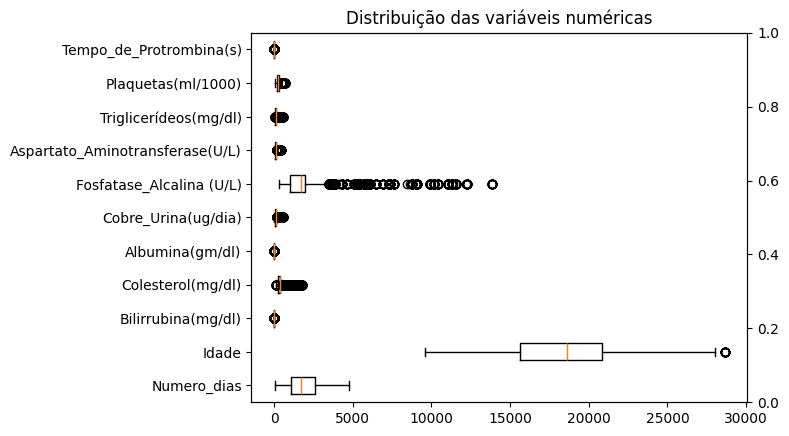

In [222]:
plot_boxplots(df=df[colunas_numericas])
plt.title('Distribuição das variáveis numéricas')

<b><span style='color:red'>Perceba que pela discrepância de amplitude dos dados devido às variáveis serem medidas de maneiras diferentes e a existência de muitas delas,
a EDA de todas tornaria o processo bastante extenso. Por isso, definimos
com base em suas importâncias para avaliação de um quadro
de cirrose, as seguintes variáveis.</span></b>

<ul style='color:black'><b>
    <li>Fosfatase alcalina</li>
    <li>Albumina</li>
    <li>Tempo de protombina</li>
</b></ul>

<u><a href="https://www.medicinanet.com.br/conteudos/revisoes/5619/cirrose_e_suas_complicacoes.htm">FONTE</a></u>

#### **Análise da Fosfatase alcalina**

<Axes: >

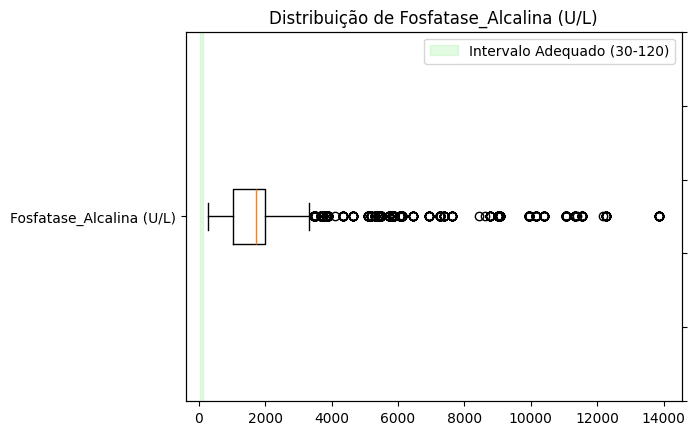

In [223]:
# Análise com Boxplots
min_fosfatase = 30
max_fosfatase = 120
plot_boxplots(serie_alvo=df['Fosfatase_Alcalina (U/L)'], min=min_fosfatase,max=max_fosfatase)

#### **Investigando a distribuição os Estágios**

A existência de muitos outliers e nenhum valor dentro da faixa adequada nos levou a investigar mais afundo aonde acontece a concentração de fosfatase em cada estágio.

In [224]:
# Função para plotar as faixas dos estágios

def plotar_faixa(df: pd.DataFrame, ax):

    cores = ['#1b2442', '#b02238', '#7992a4'] # cores para cada estágio

    for i, estagio in enumerate(df['Estágio'].unique()):
        data = df.query(f'Estágio == @estagio') # dataframe filtrado por estágio
        range_min = np.percentile(data['Fosfatase_Alcalina (U/L)'], 25) # primeiro percentil
        range_max = np.percentile(data['Fosfatase_Alcalina (U/L)'], 75) # terceiro percentil

        ax.axvspan(
            xmin=range_min,
            xmax=range_max,
            color=cores[i],
            alpha=0.5,
            label=f'Concentração do Estágio {estagio}: ({range_min:.2f} - {range_max:.2f})'
            )

    return ax

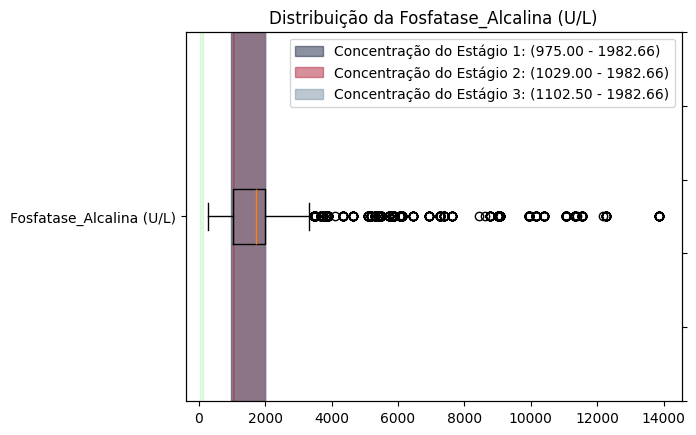

In [225]:
# Análise com Boxplot com concentração de dados por Estágio
ax = plot_boxplots(serie_alvo=df['Fosfatase_Alcalina (U/L)'], min=min_fosfatase, max=max_fosfatase,legend=False)
ax2 = plotar_faixa(df=df, ax=ax)
ax2.legend()
plt.title(f'Distribuição da {df['Fosfatase_Alcalina (U/L)'].name}')
plt.show()

Em geral, o intervalo de referência para adultos no exame de fosfatase alcalina é de 30 a 120 U/L (unidades por litro).  

<u><a href="https://nav.dasa.com.br/blog/fosfatase-alcalina">FONTE</a></u>

#### <b>Perceba que, o terceiro percentil para todos os estágios é exatamente o mesmo.</b>

Além disso, essa é a variável que mais possui outliers registrados.
Isso fica claro quando comparado com as outras, no gráfico anterior, e por algum motivo, não há nenhum paciente que se encontra no intervalo adequado.

**Tal fato nos levou a investigar isso de maneira mais profunda, e analisar os valores máximos e mínimos da fosfatase alcalina para cada estágio.**


In [226]:
for estagio in df['Estágio'].unique():
    data = df.query('Estágio == @estagio') # Dados filtrados pelo estágio da rodada
    max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    min = data['Fosfatase_Alcalina (U/L)'].min() # Valor máximo de fosfatase do estágio da rodada
    size_max = len(data[data['Fosfatase_Alcalina (U/L)'] == max]) # Tamanho dos dados em que a fosfatase possui valor máximo
    size_min = len(data[data['Fosfatase_Alcalina (U/L)'] == min]) # Tamanho dos dados em que a fosfatase possui valor mínimo
    print(f'========= ESTÁGIO {estagio} =========')
    print(f'Máx: {max:.2f} / Tamanho filtrado pelo Máx: {size_max}')
    print(f'Min: {min:.2f} / Tamanho filtrado pelo Min: {size_min}\n')

========= ESTÁGIO 1 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 11
Min: 289.00 / Tamanho filtrado pelo Min: 2

========= ESTÁGIO 2 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 3
Min: 289.00 / Tamanho filtrado pelo Min: 6

========= ESTÁGIO 3 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 4
Min: 289.00 / Tamanho filtrado pelo Min: 1



#### **Testando dropando os valores máximos**

In [227]:
for estagio in df['Estágio'].unique():
    data = df.query('Estágio == @estagio') # Dados filtrados pelo estágio da rodada
    max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    min = data['Fosfatase_Alcalina (U/L)'].min() # Valor máximo de fosfatase do estágio da rodada
    data = df[(df['Fosfatase_Alcalina (U/L)'] != max) & (df['Fosfatase_Alcalina (U/L)'] != min)] # Filtrando a tabela em que a fosfatase não possui os valores acima
    new_max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    new_min = data['Fosfatase_Alcalina (U/L)'].min()
    size_max = len(data[data['Fosfatase_Alcalina (U/L)'] == new_max]) # Tamanho dos dados em que a fosfatase possui valor máximo
    size_min = len(data[data['Fosfatase_Alcalina (U/L)'] == new_min]) # Tamanho dos dados em que a fosfatase possui valor mínimo
    print(f'========= ESTÁGIO {estagio} =========')
    print(f'Máx: {new_max:.2f} / Tamanho filtrado pelo Máx: {size_max}')
    print(f'Min: {new_min:.2f} / Tamanho filtrado pelo Min: {size_min}\n')

========= ESTÁGIO 1 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39

========= ESTÁGIO 2 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39

========= ESTÁGIO 3 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39



##### **Perceba que, assim como terceiro percentil, para cada estágio os valores máximos e mínimos são exatamente os mesmos e se repetem no mesmo estágio.**

<b><span style = "color:red">Isso pode ser explicado pelo fato de que parte dos dados da base foram gerados de maneira sintética.</span></b>

Para analisar isso em uma escala maior, criaremos uma função onde esse processo de filtragem dos dados retirando os valores máximos e mínimos atuais e contabilizando a frequência dos valores novos em rodadas para analisar o comportamento desses valores.

In [228]:
def frequency(df: pd.DataFrame, rounds: int) -> pd.DataFrame:
    list_size_min = []
    list_size_max = []
    valor_min = []
    valor_max = []
    rodadas = []

    for i in range(rounds):
        max = df['Fosfatase_Alcalina (U/L)'].max()
        min = df['Fosfatase_Alcalina (U/L)'].min()
        len_min = len(df[df['Fosfatase_Alcalina (U/L)'] == min])
        len_max = len(df[df['Fosfatase_Alcalina (U/L)'] == max])
        list_size_min.append(len_min)
        list_size_max.append(len_max)
        valor_min.append(min)
        valor_max.append(max)
        rodadas.append(i)
        df = df[(df['Fosfatase_Alcalina (U/L)'] != max) & (df['Fosfatase_Alcalina (U/L)'] != min)]

    return pd.DataFrame({
        'Rodada':rodadas,
        'Valor Mínimo':valor_min,
        'Frequência min':list_size_min,
        'Valor Máximo':valor_max,
        'Frequência max':list_size_max,
    })

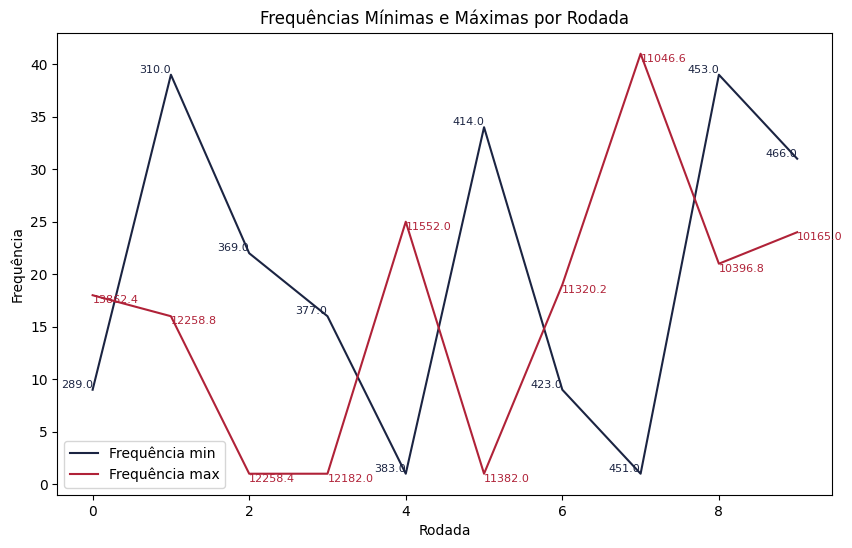

In [229]:
df_frequency = frequency(df, 10)

plt.figure(figsize=(10,6))
plt.plot(df_frequency['Rodada'], df_frequency['Frequência min'], label='Frequência min', color='#1b2442')
plt.plot(df_frequency['Rodada'], df_frequency['Frequência max'], label='Frequência max', color='#b02238')
plt.title('Frequências Mínimas e Máximas por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Frequência')
plt.legend()
for i in range(len(df_frequency)):
    plt.text(
        df_frequency['Rodada'][i], df_frequency['Frequência min'][i],
        f'{df_frequency["Valor Mínimo"][i]:.1f}',
        ha='right',
        va='bottom',
        color='#1b2442',
        fontsize=8
        )
    plt.text(
        df_frequency['Rodada'][i], df_frequency['Frequência max'][i],
        f'{df_frequency["Valor Máximo"][i]:.1f}',
        ha='left',
        va='top',
        color='#b02238',
        fontsize=8
        )

plt.show()

Perceba que, ao diminuir a frequência de um valor mínimo, a de um valor máximo aumenta, e vice versa.

<Axes: title={'center': 'Distribuição da frequência de Fosfatase_Alcalina (U/L)'}>

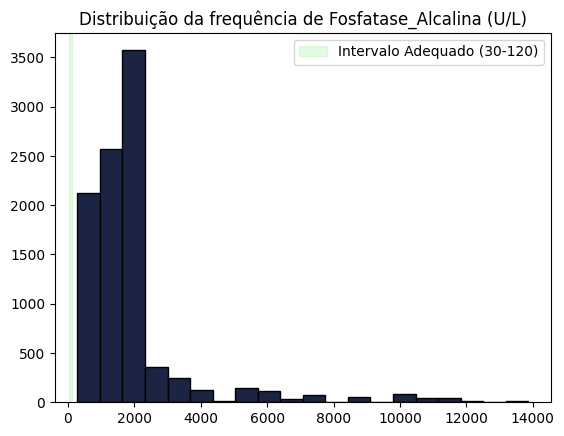

In [230]:
# Análises com histogramas
plot_histogramas(serie_alvo=df['Fosfatase_Alcalina (U/L)'],min=30, max=120)

Perceba que essa variável é enviesada para a esquerda.

#### **Análise da Albumina**

<Axes: >

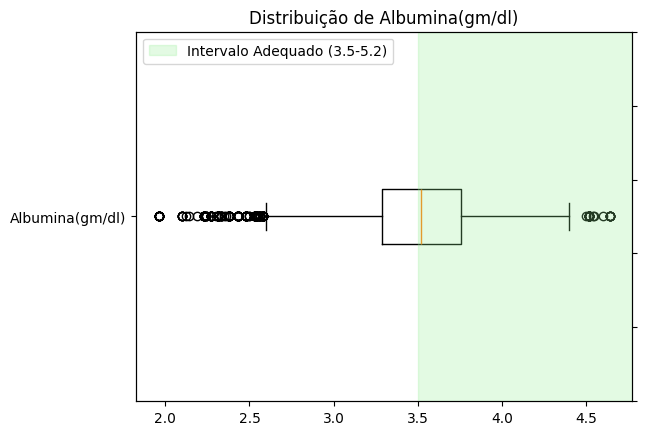

In [231]:
# Análise com Boxplot
min_albumina = 3.5
max_albumina = 5.2
plot_boxplots(serie_alvo=df['Albumina(gm/dl)'], min=min_albumina,max=max_albumina)

"O valor ideal de Albumina (gm/dl) para pessoas de 19 - 60 anos é de 3.50 – 5.20 g/dL"

<u><a hre = "https://cedirlab.com.br/exames-vacinas/exames/albumina/">FONTE</a></u>

<Axes: title={'center': 'Distribuição da frequência de Albumina(gm/dl)'}>

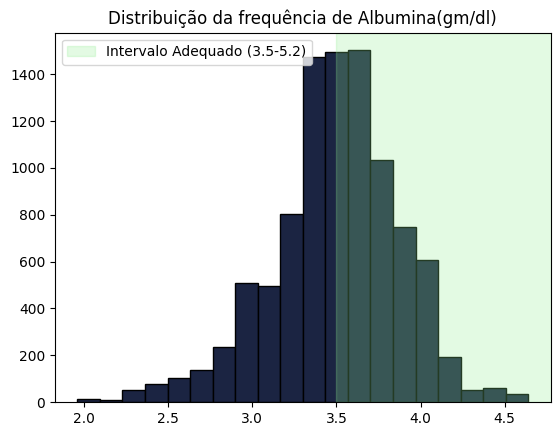

In [232]:
# Análises com histogramas
plot_histogramas(serie_alvo=df['Albumina(gm/dl)'], min=min_albumina, max=max_albumina)

Já essa, possui uma distribuição mais normalizada., porém cerca de metade dos pacientes não está no intervalo adequado.

#### **Tempo de protombina**

<Axes: >

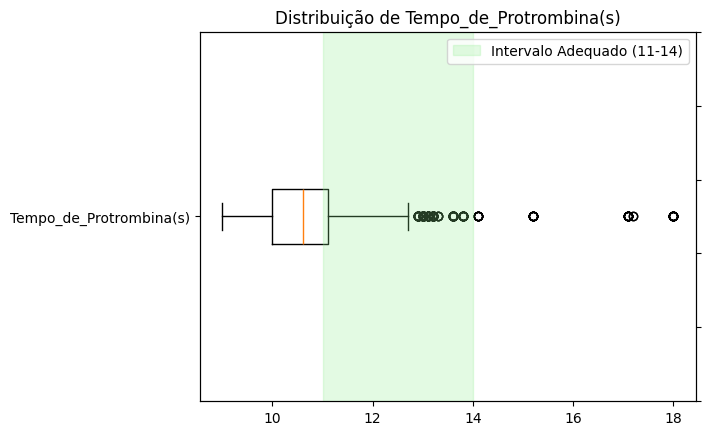

In [233]:
# Análise com Boxplots
min_protombina = 11
max_protombina= 14
plot_boxplots(serie_alvo=df['Tempo_de_Protrombina(s)'],min=min_protombina,max=max_protombina)

"O valor de referência do tempo de protrombina varia de acordo com o laboratório. No entanto, em geral, o valor aceito como normal é de 11 a 14 segundos, com atividade de protrombina maior que 70%."

<u><a href = "https://nav.dasa.com.br/blog/tempo-de-protrombina">FONTE</a></u>

<Axes: title={'center': 'Distribuição da frequência de Tempo_de_Protrombina(s)'}>

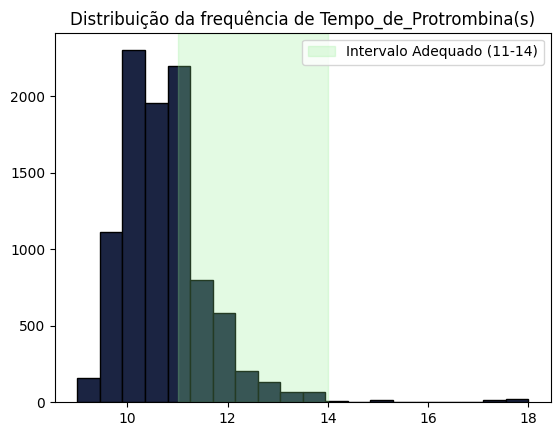

In [234]:
# Análise com Histogramas
plot_histogramas(serie_alvo=df['Tempo_de_Protrombina(s)'], min=min_protombina, max=max_protombina)

---
## Seção 2: Faixa etária dos casos de estudo
---

Antes de tudo, será criada uma função para calcular e plottar a distribuição normal dos dados analisados, que utilizamos repetidamente a seguir.

In [235]:
# Algoritmo para calcular a distribuição normal

def distribuicao_normal(data):
    mean = data['Idade_ano'].mean()
    std = data['Idade_ano'].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    bin_width = (xmax - xmin) / 30
    p = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    p = p * len(data) * bin_width

    return x, p


### **Análise: Situação dos pacientes de acordo com a faixa de idade**

A análise das idades é de extrema importância para identificar qualquer tipo de viés nos dados. É a melhor coluna dos dados numéricos para analisar a distribuição dos pacientes.

Por exemplo, se percebemos uma frequência maior de pessoas mais novas, percebemos que os dados estão enviesados, pois é de censo comum que cirrose geralmente acomete pessoas mais velhas.

Como a idade dos pacientes está disposta em dias, é preciso convertê-las para ano.

In [236]:
# Convertendo dias para anos
df['Idade_ano'] = (df['Idade']/365).astype(int)
df['Idade_ano']

0       50
1       54
2       32
3       45
4       59
        ..
9632    49
9633    64
9634    67
9635    58
9636    78
Name: Idade_ano, Length: 9637, dtype: int32

In [237]:
# Atualizando colunas numéricas
df.drop('Idade', axis=1, inplace=True)
colunas_numericas.remove('Idade')
colunas_numericas.append('Idade_ano')

<Axes: >

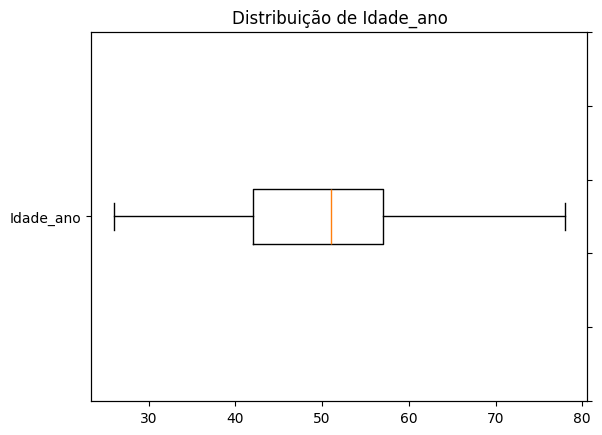

In [238]:
# Análise com Boxplots
plot_boxplots(serie_alvo=df['Idade_ano'])

Perceba que os dados estão bem distribuídos não há nenhum outlier identificado, mostrando uma boa consistência.

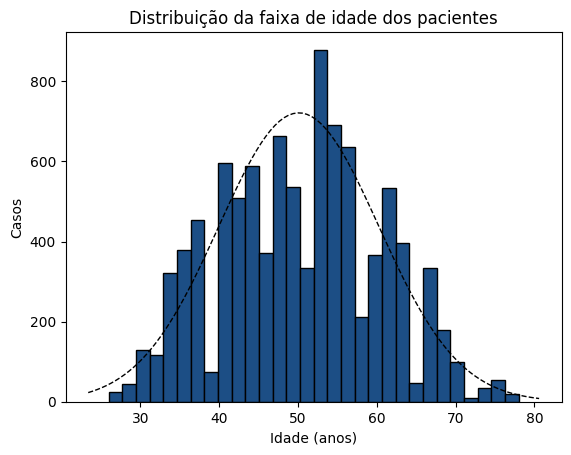

In [240]:
# Frequência de pacientes por faixa de idade
df['Idade_ano'].plot(kind='hist', bins=30, color='#1C4E85', edgecolor='black')

x, p = distribuicao_normal(df)

plt.plot(x, p, 'k', linewidth=1, linestyle='--')
plt.title("Distribuição da faixa de idade dos pacientes")
plt.xlabel("Idade (anos)")
plt.ylabel("Casos")
plt.show()

#### Conclusões:
* Perceba que, como comentado anteriormente, a maior parte dos casos está concentrada no meio do gráfico, devido ao fato que a cirrose é uma doença tende a afetar pessoas mais velhas que tinham um costume de beber quando eram mais jovens. Ou seja, [pessoas na faixa dos 40 a 60 anos](https://profluizcarneiro.com.br/doencas-comuns/figado/cirrose/) tem mais risco de ser vítima dessa doença.

### **Taxa de sobrevivência de acordo com a idade**

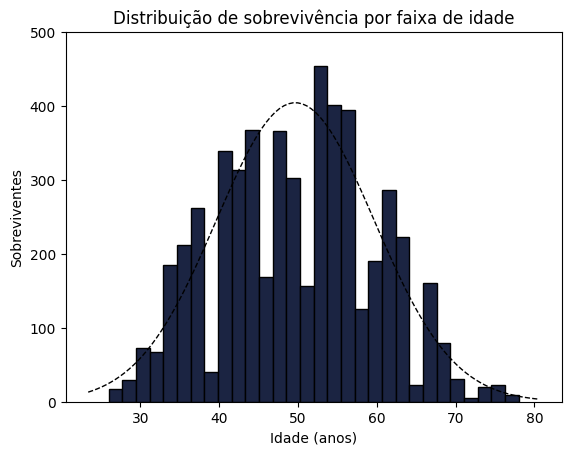

In [241]:
# Frequência de sobrevivência por faixa de idade

# Query pra utilizar apenas as linhas onde a situação do paciente é de sobrevivência
dados_sobrevivência = df.query('Situação == "Sobreviveu"')
ax = dados_sobrevivência['Idade_ano'].plot(kind='hist', bins=30, color='#1b2442', edgecolor='black')

x, p = distribuicao_normal(dados_sobrevivência)

plt.plot(x, p, 'k', linewidth=1, linestyle='--')
plt.title("Distribuição de sobrevivência por faixa de idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Sobreviventes")
plt.ylim(0, 500)
plt.show()

#### Conclusões:
* Na situação de sobrevivência, temos um gráfico bem análogo ao anterior, nada a ser comentado.

### **Taxa de mortes de acordo com a idade**

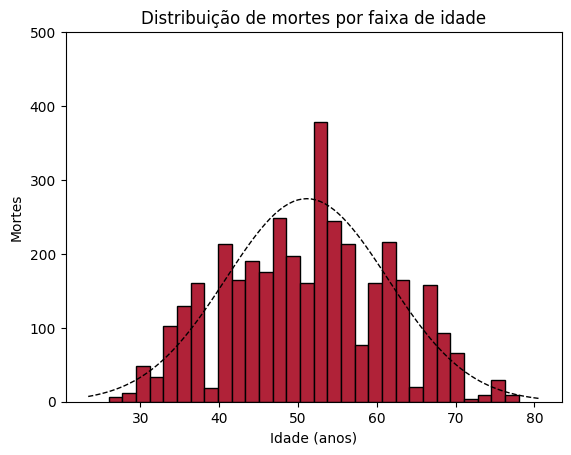

In [242]:
# Frequência de mortes por faixa de idade

# Query pra utilizar apenas as linhas onde a situação do paciente é de morte
dados_mortes = df.query('Situação == "Morte"')
ax = dados_mortes['Idade_ano'].plot(kind='hist', bins=30, color='#b02238', edgecolor='black')

x, p = distribuicao_normal(dados_mortes)

plt.plot(x, p, 'k', linewidth=1, linestyle='--')
plt.title("Distribuição de mortes por faixa de idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Mortes")
plt.ylim(0, 500)
plt.show()

#### Conclusões:
* A distribuição da taxa de mortes também é bem parecida com as anteriores, mas é interessante notar que há uma leve normalização dos casos, se aproximando mais da linha de distribuição normal, porém um distanciamento severo do pico. Isso pode sugerir que a faixa de idade entre os 50-60 anos é de fato a com mais risco quando se trata de cirrose e fatalidade.

### **Taxa de transplantes de acordo com a idade**

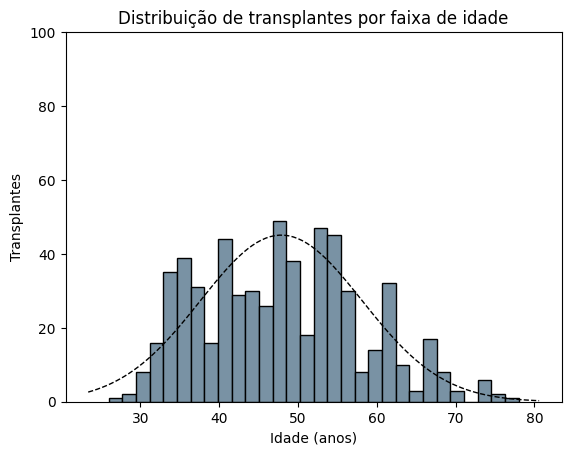

In [243]:
# Frequência de transplantes por faixa de idade

# Query pra utilizar apenas as linhas onde a situação do paciente é de transplante
dados_transplante = df.query('Situação == "Transplante"')
ax = dados_transplante['Idade_ano'].plot(kind='hist', bins=30, color='#7992a4', edgecolor='black')

x, p = distribuicao_normal(dados_transplante)

plt.plot(x, p, 'k', linewidth=1, linestyle='--')
plt.title("Distribuição de transplantes por faixa de idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Transplantes")
plt.ylim(0, 100)
plt.show()

#### Conclusões:
* O gráfico da distribuição dos pacientes que tiveram a realização de um transplante é interessante, porque é bem mais "plano" que os outros. As altas proporções na faixa dos 30-40 aos pode sugerir que, ao ser diagnosticado com cirrose numa idade mais jovem, a alternativa do transplante seja sugerida precocemente como método eficaz de tratar a cirrose, sendo mais requisitada para aqueles que ainda desejam obter uma expectativa de vida mais prolongada.

---
## Seção 3: Problemas apresentados e drogas aplicadas
---

### **Análise: Relação entre o tipo da droga recebida e a situação do paciente**

Droga
Placebo           6212
D-penicilamina    3425
Name: count, dtype: int64 

Situação
Sobreviveu     5325
Morte          3704
Transplante     608
Name: count, dtype: int64


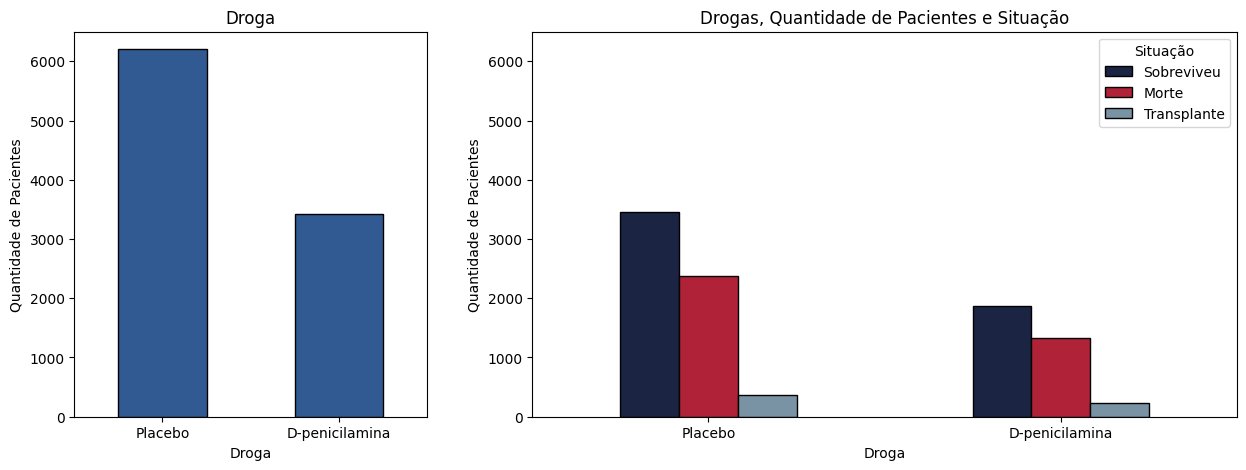

In [244]:
print(df_cirrose['Droga'].value_counts(), '\n')
print(df_cirrose['Situação'].value_counts())

fig = plt.figure(figsize=(15, 5))

# Ajustando a largura relativa dos subplots
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# Criando uma lista de eixos (axs) e adicionando subplots ao GridSpec
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]

colors0 = ['#2156a2', '#2156a2']
sns.countplot(data=df_cirrose, x='Droga', palette=colors0, edgecolor='black', width=0.5, ax=axs[0])
axs[0].set_title('Droga')
axs[0].set_xlabel('Droga')
axs[0].set_ylabel('Quantidade de Pacientes')
axs[0].set_ylim(0, 6500)

colors1 = ['#1b2442', '#b02238', '#7992a4']
sns.countplot(data=df_cirrose, x='Droga', hue='Situação', palette=colors1, edgecolor='black', width=0.5, saturation=1, ax=axs[1])
axs[1].set_title('Drogas, Quantidade de Pacientes e Situação')
axs[1].set_xlabel('Droga')
axs[1].set_ylabel('Quantidade de Pacientes')
axs[1].legend(title='Situação')
axs[1].set_ylim(0, 6500)


plt.show()

#### Conclusões:
* A análise dos gráficos e dos dados nos permite visualizar que mais da metade dos pacientes que utilizam uma das duas drogas sobrevivem. Além disso, apesar dos números de sobreviventes serem altos, o número de mortes também é elevado. Por fim, nota-se que o número de pacientes transplantados é muito pequeno quando comparado aos números de sobreviventes e de mortes. Dessa forma, concluímos que, independentemente da droga utilizada, o risco de morte é alto.

### **Análise: Distribuição dos problemas apresentados pelos pacientes**

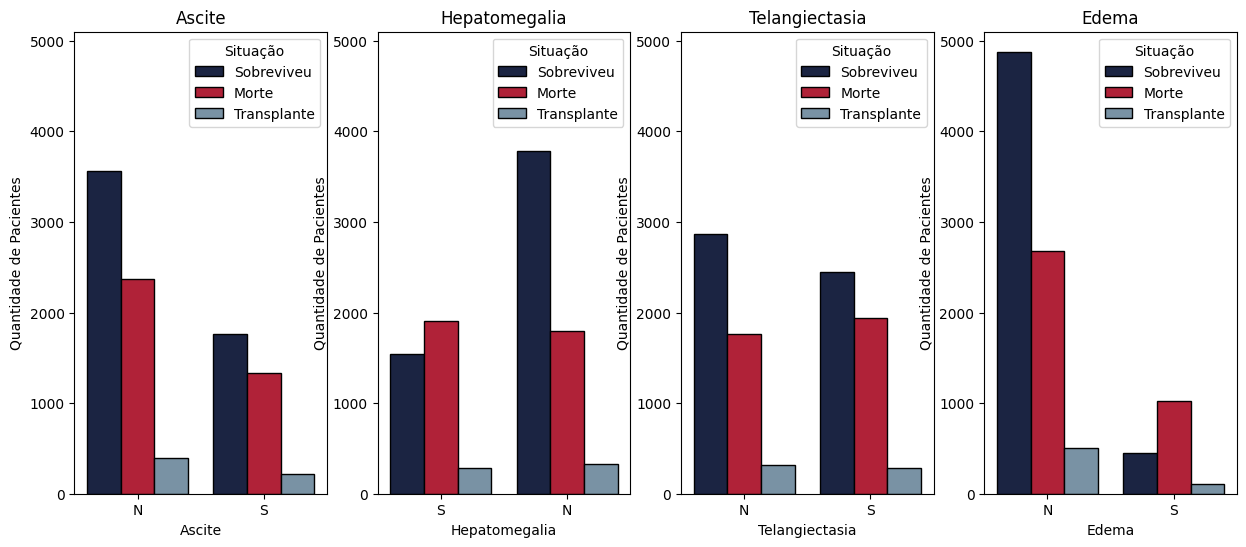

In [245]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
colors = ['#1b2442', '#b02238', '#7992a4']

sns.countplot(data=df_cirrose, x='Ascite', hue='Situação', palette=colors, edgecolor='black', saturation=1 ,ax=axs[0])
axs[0].set_title('Ascite')
axs[0].set_xlabel('Ascite')
axs[0].set_ylabel('Quantidade de Pacientes')
axs[0].set_ylim(0, 5100)
axs[0].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Hepatomegalia', hue='Situação', palette=colors, edgecolor='black', saturation=1, ax=axs[1])
axs[1].set_title('Hepatomegalia')
axs[1].set_xlabel('Hepatomegalia')
axs[1].set_ylabel('Quantidade de Pacientes')
axs[1].set_ylim(0, 5100)
axs[1].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Telangiectasia', hue='Situação', palette=colors, edgecolor='black', saturation=1, ax=axs[2])
axs[2].set_title('Telangiectasia')
axs[2].set_xlabel('Telangiectasia')
axs[2].set_ylabel('Quantidade de Pacientes')
axs[2].set_ylim(0, 5100)
axs[2].legend(title='Situação')

sns.countplot(data=df_cirrose, x='Edema', hue='Situação', palette=colors, edgecolor='black', saturation=1, ax=axs[3])
axs[3].set_title('Edema')
axs[3].set_xlabel('Edema')
axs[3].set_ylabel('Quantidade de Pacientes')
axs[3].set_ylim(0, 5100)
axs[3].legend(title='Situação')

plt.show()

#### Conclusões:
* Ao comparar os gráficos anteriores, percebemos que telangiectasia não é um fator determinante para a sobrevivência do paciente. Além disso, observa-se que pacientes que não possuem hepatomegalia têm muito mais chances de sobrevivência do que aqueles que possuem, o mesmo ocorre para os pacientes que possuem edema.

---
## Seção 4: Correlação entre variáveis do dataset
---

### **Análise: Investigando correlações**

Correlação consiste na interação entre duas variáveis, ou seja, se eu quero investigar a correlação entre duas variáveis, devo analisar como uma se comporta em função da outra, para descobrir se elas se influenciam.

Os tipos de correlações podem ser:

* Direta (Uma sobe, outra também sobe)
* Indireta (Uma sobe, outra desce)

Além disso é possível medir a força dessas correlações, ou seja, metrificar o quanto elas se relacionam. Para isso, calculamos o coeficente de correlação, que varia de -1 a 1. Quanto mais próximo de uma das extremidades mais a correlação é forte, caso o contrário, é fraca. Coeficientes negativos são correlações indiretas e positivos são correlações diretas.

In [246]:
# Calculando a correlação entre as variáveis

"""O método .corr() retorna uma matriz com os coeficientes
de correlação das variáveis."""

df[colunas_numericas].corr()

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
Numero_dias,1.000000,-0.360158,-0.128592,0.356754,-0.282194,0.103289,-0.172729,-0.122716,0.076867,-0.095059,-0.041071
Bilirrubina(mg/dl),-0.360158,1.000000,0.352127,-0.261299,0.415027,0.132425,0.352460,0.348504,-0.057867,0.170697,0.032688
Colesterol(mg/dl),-0.128592,0.352127,1.000000,-0.062756,0.145983,0.117626,0.322665,0.267340,0.021653,0.002592,-0.017204
Albumina(gm/dl),0.356754,-0.261299,-0.062756,1.000000,-0.168683,-0.112587,-0.147348,-0.103031,0.107514,-0.156307,-0.079731
Cobre_Urina(ug/dia),-0.282194,0.415027,0.145983,-0.168683,1.000000,0.184010,0.285076,0.239766,-0.041500,0.101950,0.022662
Fosfatase_Alcalina (U/L),0.103289,0.132425,0.117626,-0.112587,0.184010,1.000000,0.137345,0.153644,0.010288,0.064008,0.019881
Aspartato_Aminotransferase(U/L),-0.172729,0.352460,0.322665,-0.147348,0.285076,0.137345,1.000000,0.119134,-0.037032,0.072822,-0.003902
Triglicerídeos(mg/dl),-0.122716,0.348504,0.267340,-0.103031,0.239766,0.153644,0.119134,1.000000,-0.009481,0.022054,0.024557
Plaquetas(ml/1000),0.076867,-0.057867,0.021653,0.107514,-0.041500,0.010288,-0.037032,-0.009481,1.000000,-0.129620,-0.112695
Tempo_de_Protrombina(s),-0.095059,0.170697,0.002592,-0.156307,0.101950,0.064008,0.072822,0.022054,-0.129620,1.000000,0.060620


#### **Mapas de calor**

O que é um mapa de calor?

Um mapa de calor é uma representação gráfica de dados onde os valores são exibidos em uma matriz ou tabela e são representados por cores. É uma ferramenta eficaz para visualizar padrões, variâncias e correlações em conjuntos de dados complexos.

**Características**

- **Cores**: As cores representam os valores dos dados. Geralmente, uma paleta de cores é usada para mostrar a intensidade dos valores, onde cores mais escuras ou mais quentes (vermelho, laranja) representam valores mais altos e cores mais claras ou mais frias (azul, verde) representam valores mais baixos.

- **Matriz**: O mapa de calor é organizado como uma matriz, onde cada célula da matriz corresponde a um valor de dados.

- **Eixos**: Os eixos do mapa de calor geralmente representam diferentes categorias ou dimensões dos dados.

- **Legenda**: Uma barra de cores ou legenda é frequentemente incluída para mostrar a escala de valores correspondentes às cores.


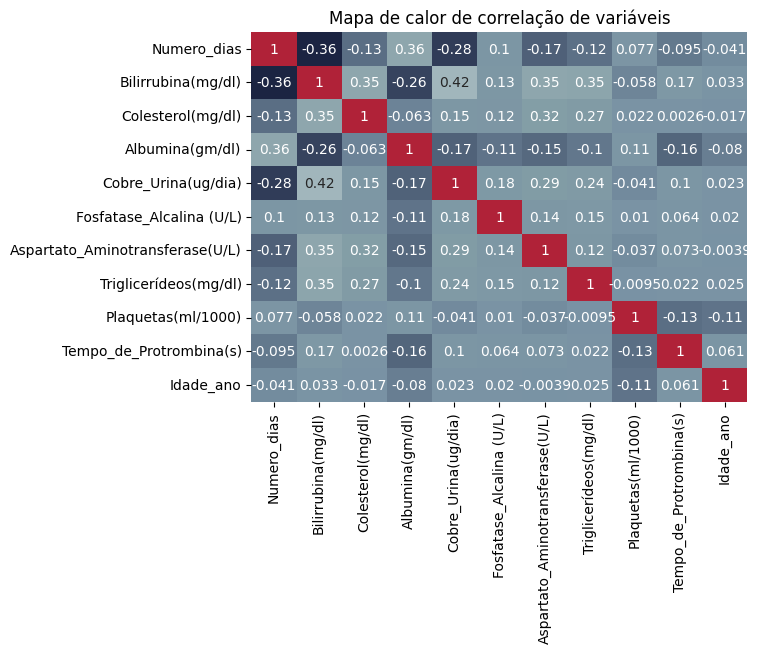

In [247]:
# EXEMPLO
colors = ["#1b2442","#7992a4","#829da5","#f4f7f7","#b02238"]
cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)
sns.heatmap(
    df[colunas_numericas].corr(), # Matriz de correlações
    annot=True, # Escreve os valores dos coeficientes
    cmap=cmap, # Paleta de cores
    cbar=False # Desativa a legenda
    )
plt.title("Mapa de calor de correlação de variáveis")
plt.show()

A princípio, os dados não apresentaram nenhuma correlação forte, mas vamos selecionar as top 3 mais correlacionadas para se aprofundar.

Porém, como há diferença de unidades de medida nas variáveis, há a possibilidade de que após uma normalização dos dados, seja possível calcular correlações mais fortes.

* Cobre na Urina X Bilirrubina
* Abulmina X Dias de tratamento
* Bilirrubina X Dias de tratamento

Perceba também que Abulmina e Bilirrubina se correlacionam com a mesma força em relaçao a Dias de tratamento, porém de maneira inversa.

#### **Cobre na Urina X Bilirrubina**

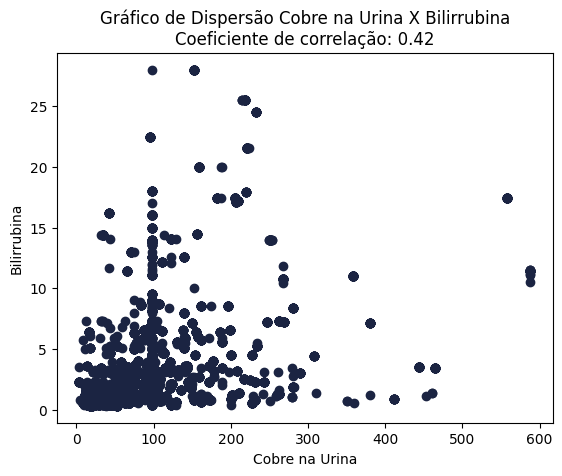

In [248]:
# Gráfico de Dispersão

plt.scatter(
    df['Cobre_Urina(ug/dia)'],
    df['Bilirrubina(mg/dl)'],
    color='#1b2442'
)

plt.title(
    'Gráfico de Dispersão Cobre na Urina X Bilirrubina\n'
    f'Coeficiente de correlação: {df['Cobre_Urina(ug/dia)'].corr(df['Bilirrubina(mg/dl)']):.2f}')
plt.xlabel('Cobre na Urina')
plt.ylabel('Bilirrubina')
plt.show()

Perceba que a dispersão dos dados aumenta linearmente, como um cone
Esse gráfico demonstra que há muita dispersão, logo é **NÃO** uma correlação forte

#### **Abulmina X Dias de tratamento**

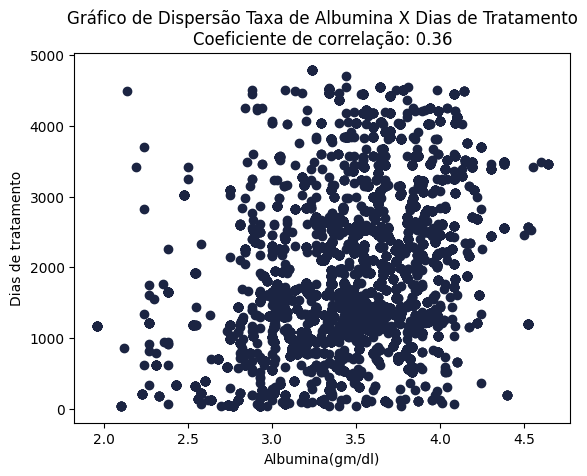

In [249]:
# Gráfico de Dispersão

plt.scatter(
    df['Albumina(gm/dl)'],
    df['Numero_dias'],
    color='#1b2442'
)

plt.title(
    'Gráfico de Dispersão Taxa de Albumina X Dias de Tratamento\n'
    f'Coeficiente de correlação: {df['Albumina(gm/dl)'].corr(df['Numero_dias']):.2f}')
plt.xlabel('Albumina(gm/dl)')
plt.ylabel('Dias de tratamento')
plt.show()

Como a outra correlação selecionada possui mesma força porém inversa, o gráfico será semelhante porém invertido.

---
## Seção 5: Médias dos atributos de acordo com o estágio da cirrose
---

### **Análise: Quantidade média das substâncias e condições em cada estágio da cirrose**

Primeiramente, vamos criar uma função que será utilizada frequentemente para calcular automaticamente as médias de determinado dado selecionado de acordo com os 3 estágios da cirrose.

In [250]:
# Função que retorna a média de determinada coluna pra cada estágio da doença
def stage_means(column):
    mean1 =  df.loc[df['Estágio'] == 1, column].mean()
    mean2 =  df.loc[df['Estágio'] == 2, column].mean()
    mean3 =  df.loc[df['Estágio'] == 3, column].mean()

    return [mean1, mean2, mean3]

#### **Relação de Cobre na Urina por estágio**

<Axes: >

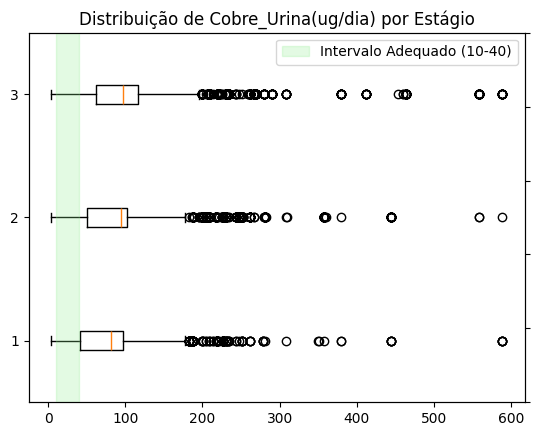

In [251]:
min_cobre = 10
max_cobre = 40
plot_boxplots(df=df,serie_categoria=df['Estágio'],serie_alvo=df['Cobre_Urina(ug/dia)'],min=min_cobre,max=40)

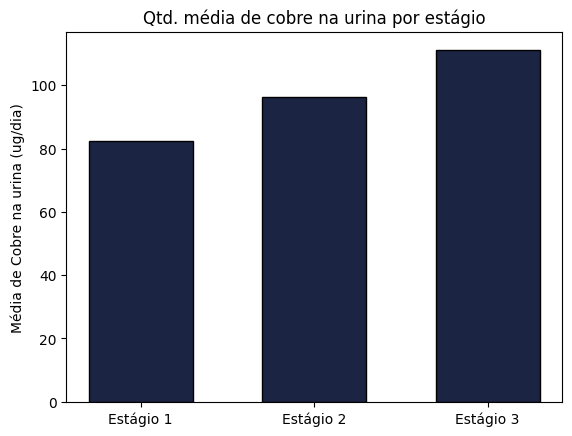

In [283]:
media_cobre_estagio = df.groupby('Estágio')['Cobre_Urina(ug/dia)'].mean().reset_index()
map = {
    1:'Estágio 1',
    2:'Estágio 2',
    3:'Estágio 3'
}
fig, ax = plt.subplots()
ax.bar(
    media_cobre_estagio['Estágio'].map(map),
    media_cobre_estagio['Cobre_Urina(ug/dia)'],
    width=0.6,
    color="#1b2442",
    edgecolor='black',
)
plt.title('Qtd. média de cobre na urina por estágio')
plt.ylabel('Média de Cobre na urina (ug/dia)')
plt.show()

##### Conclusões:
* Perceba que o nível de cobre na urina aumenta conforme o estágio também, o que indica um fator de agravamento da doença.

#### **Relação entre Plaquetas por estágio e situação**

<Axes: >

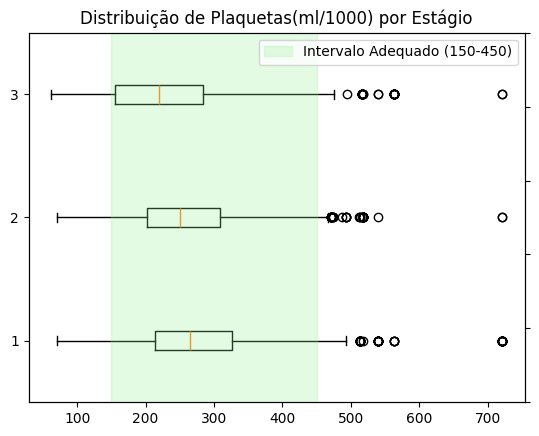

In [253]:
min_plaquetas = 150
max_plaquetas = 450
plot_boxplots(df=df,serie_categoria=df['Estágio'],serie_alvo=df['Plaquetas(ml/1000)'], min=min_plaquetas,max=max_plaquetas)

Apesar da maioria dos paciente do estágio 3 possuir uma taxa de plaquetas dentro do ideal, é o estágio com menor taxa.

#### **Média de Plaquetas Estágio**

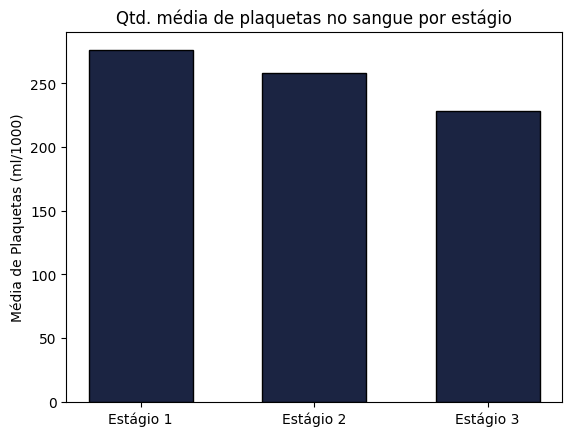

In [285]:
media_plaqueta_estagio = df.groupby('Estágio')['Plaquetas(ml/1000)'].mean().reset_index()
fig, ax = plt.subplots()
ax.bar(
    media_plaqueta_estagio['Estágio'].map(map),
    media_plaqueta_estagio['Plaquetas(ml/1000)'],
    width=0.6,
    color='#1b2442',
    edgecolor='black',
)
plt.ylabel("Média de Plaquetas (ml/1000)")
plt.title('Qtd. média de plaquetas no sangue por estágio')
plt.show()

##### Conclusões:
* Perceba uma redução na taxa de plaquetas conforme a piora do estágio. Mesmo que ainda esteja dentro da "faixa ideal", a diminuição de fato ocorre.

#### **Distribuição de Plaquetas por fim de tratamento**

<Axes: >

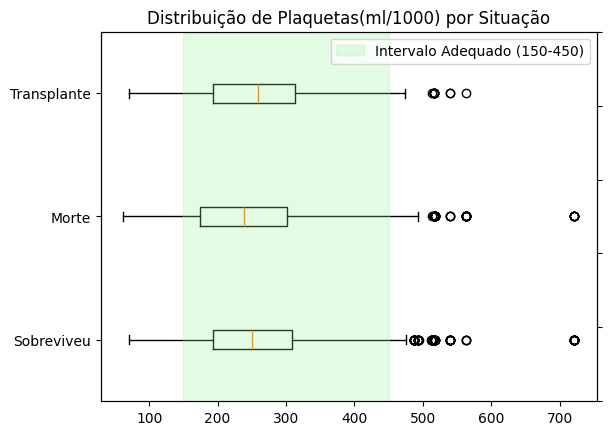

In [255]:
plot_boxplots(df=df,serie_categoria=df['Situação'],serie_alvo=df['Plaquetas(ml/1000)'],min=min_plaquetas,max=max_plaquetas)

A maioria dos pacientes encontra-se numa faixa de plaquetas adequada independente do fim do tratamento.

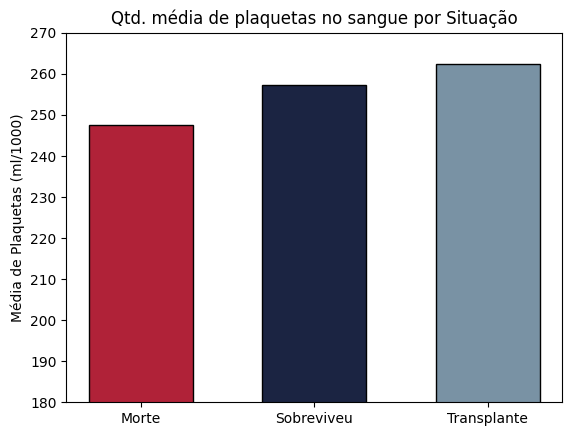

In [287]:
media_plaqueta_situacao = df.groupby('Situação')['Plaquetas(ml/1000)'].mean().reset_index()
fig, ax = plt.subplots()
ax.bar(
    media_plaqueta_situacao['Situação'],
    media_plaqueta_situacao['Plaquetas(ml/1000)'],
    width=0.6,
    color=['#b02238', '#1b2442', '#7992a4'],
    edgecolor='black'
)
ax.set_ylim([180,270]) # Definindo as extremidades dos gráficos para enfatizar as diferenças
plt.title('Qtd. média de plaquetas no sangue por Situação')
plt.ylabel("Média de Plaquetas (ml/1000)")
plt.show()

##### Conclusões:
* Os pacientes translantados apresentaram maior taxa de plaquetas após o fim do tratamento, revelando talvez, uma boa eficácia do procedimento.

#### **Média de Fosfatase Alcalina por estágio**

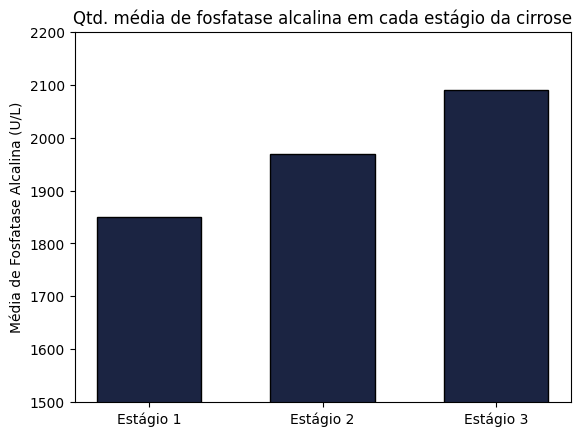

In [273]:
# Média de fosfatase alcalina por estágio
stages = ['Estágio 1', 'Estágio 2', 'Estágio 3']
phosValues = stage_means('Fosfatase_Alcalina (U/L)')

plt.bar(stages, phosValues, width=0.6, edgecolor='black', color='#1b2442')
plt.ylabel("Média de Fosfatase Alcalina (U/L)")
plt.title("Qtd. média de fosfatase alcalina em cada estágio da cirrose")
plt.ylim(1500, 2200)

plt.show()

##### Conclusões:
* Nossa hipótese era que a taxa de fosfatase alcalina deveria aumentar com o decorrer da cirrose. E de fato, com o gráfico podemos concluir que há um aumento de aproximadamente 200U/L dessa enzima no organismo dos pacientes com cirrose em estágios mais avançados.

#### **Média de Albumina por estágio**

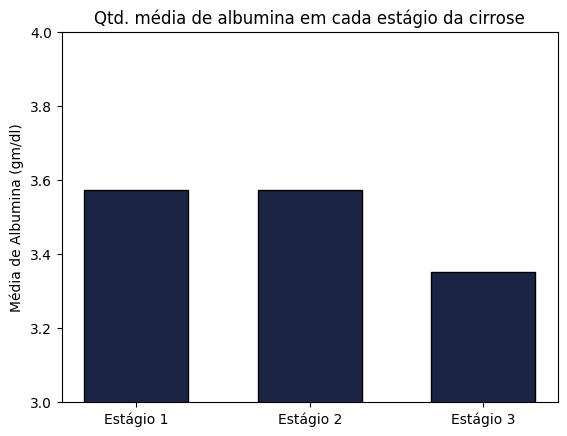

In [278]:
# Média de albumina por estágio
albValues = stage_means('Albumina(gm/dl)')

plt.bar(stages, albValues, width=0.6, edgecolor='black', color='#1b2442')
plt.ylabel("Média de Albumina (gm/dl)")
plt.title("Qtd. média de albumina em cada estágio da cirrose")
plt.ylim(3, 4)

plt.show()

##### Conclusões:
* Apesar da taxa se manter similar entre os estágios 1 e 2, aqui é perceptível no estágio 3 uma diminuição considerável. Isso reflete a debilitação das capacidades do fígado em produzir essa proteína, o que é realmente parte do esperado.

#### **Média de Bilirrubina por estágio**

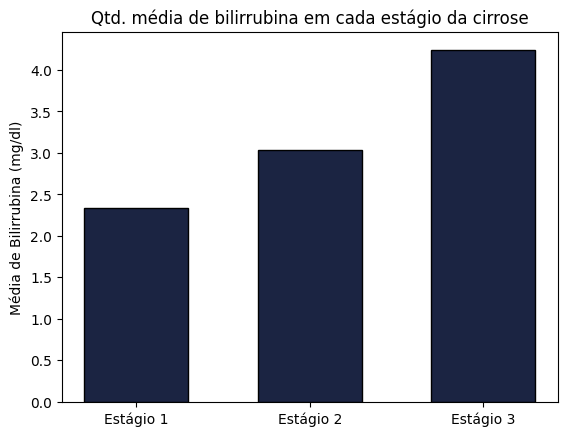

In [277]:
# Média de bilirrubina por estágio
biliValues = stage_means('Bilirrubina(mg/dl)')

plt.bar(stages, biliValues, width=0.6, edgecolor='black', color='#1b2442')
plt.ylabel("Média de Bilirrubina (mg/dl)")
plt.title("Qtd. média de bilirrubina em cada estágio da cirrose")

plt.show()

##### Conclusões:
* A bilirrubina é normalmente processada e eliminada pelo fígado, mas com um fígado comprometido ocorre um acúmulo prejudicial dessa substância. A nossa análise demonstra que realmente, o acúmulo aumenta do estágio 1 pro 2 pro 3, refletindo uma piora do desempenho do fígado.

#### **Tempo médio de Protrombina por estágio**

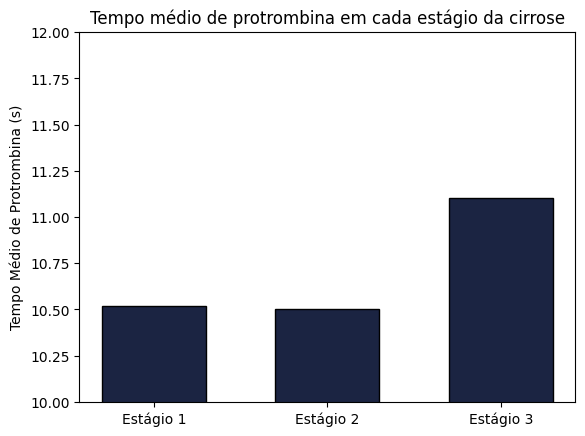

In [276]:
# Média do tempo de protrombina por estágio
protValues = stage_means('Tempo_de_Protrombina(s)')

plt.bar(stages, protValues, width=0.6, edgecolor='black', color='#1b2442')
plt.ylabel("Tempo Médio de Protrombina (s)")
plt.title("Tempo médio de protrombina em cada estágio da cirrose")
plt.ylim(10, 12)

plt.show()

##### Conclusões:
* A hipótese cogitada era que o tempo de protrombina aumentaria com o decorrer dos estágios, visto que a coagulação sanguínea fica comprometida quando o fígado está afetado. O gráfico surpreendentemente mostra uma diminuição sutil da média no estágio 2, mas um aumento considerável de mais de meio segundo no estágio 3.

#### **Tempo médio para morte por estágio**

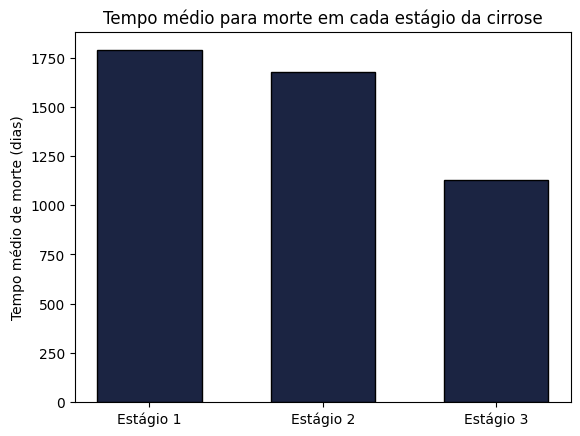

In [275]:
# Tempo médio pra morte em cada estágio
deathTime1 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 1), 'Numero_dias'].mean()
deathTime2 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 2), 'Numero_dias'].mean()
deathTime3 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 3), 'Numero_dias'].mean()
deathValues = [deathTime1, deathTime2, deathTime3]


plt.bar(stages, deathValues, width=0.6, edgecolor='black', color='#1b2442')
plt.ylabel("Tempo médio de morte (dias)")
plt.title("Tempo médio para morte em cada estágio da cirrose")

plt.show()

##### Conclusões:
* Acima podemos perceber um decrescimento claro da expectativa de vida nos pacientes de cirrose. O tempo de morte seria a contagem de dias desde o início do estudo de caso até o óbito de cada paciente. Note que há uma diminuição de quase 2 anos na expectativa, o que torna o quadro bem grave.

---
## Seção 6: Distribuição de sobreviventes/mortos por estágio
---

### Análise: Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose

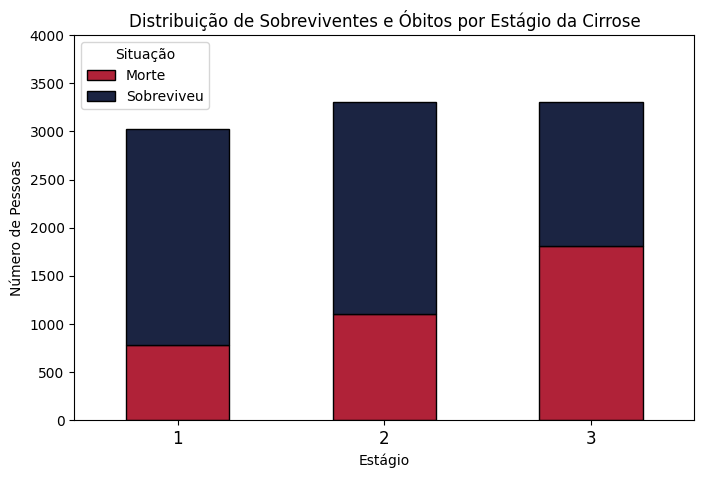

In [288]:
# Filtrando e agrupando o DataFrame para remover as entradas com 'Transplante'
df_filtrado = df_cirrose[df_cirrose['Situação'] != 'Transplante']
contagem = df_filtrado.groupby(['Estágio', 'Situação']).size().unstack()

fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#b02238', '#1b2442']

contagem.plot(kind='bar', ax=ax, stacked=True, color=colors, edgecolor='black')
plt.xlabel('Estágio')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose')
plt.legend(title='Situação', labels=['Morte', 'Sobreviveu'])
ax.set_ylim(0, 4000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

plt.show()


#### Conclusões:
* Nessa análise, percebemos que conforme os estágios da cirrose vão progredindo, mais sucetíveis as pessoas ficam de não sobreviver. Enquanto nos estágios inicias da doença, todos tem mais chance de continuarem vivos.
* Desse modo, concluímos que os tratamentos da cirrose não tendem a ser tão efetivos nos estágios mais avançados e que o quanto antes for tratado, melhor para o paciente.

---
## Seção 7: Relação entre sexo e gravidade da cirrose
---

### Análise: Quantidade de Homens e Mulheres por Estágio da Doença

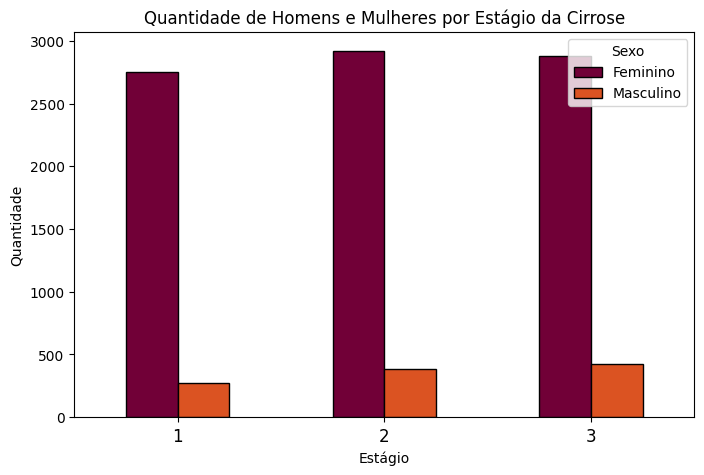

In [263]:
# Agrupando os dados
grouped_data = df_cirrose.groupby(['Estágio', 'Sexo']).size().unstack()

fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#710037', '#db5322']

grouped_data.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
plt.title('Quantidade de Homens e Mulheres por Estágio da Cirrose')
plt.xlabel('Estágio')
plt.ylabel('Quantidade')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

plt.show()

#### Conclusões:
* Com esse gráfico de barras agrupados, é perceptível que o grupo das mulheres é abrangentemente mais afetado em todas os estágio da doença, enquanto que os homens estão em minoria, com o grupo das mulheres sendo uma média de 10x maior que os homens, com uma diferença média de 90% entre os dois grupos em todos os estágios da doença.


* Também podemos perceber que o número de pessoas de ambas as classes vai aumentando com o passar do nível do estágio da cirrose, o que indica que a doença tende a ser bem progressiva e dificilmente um paciente é curado já no primeiro estágio




### Análise: Quantidade de Sobreviventes/Transplantados e mortos por sexo (Masculino e Feminino)

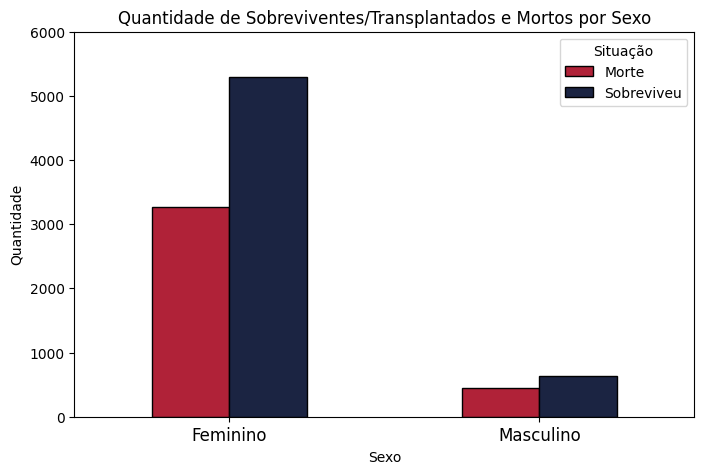

In [264]:
# Considerando o valor de "Transplante" como "Sobreviveu"
df_cirrose['Situação'] = df_cirrose['Situação'].replace('Transplante', 'Sobreviveu')

# Contando sobreviventes/transplantados e mortos por sexo
contagem = df_cirrose.groupby(['Sexo', 'Situação']).size().unstack()

fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#b02238', '#1b2442']

contagem.plot(kind='bar', ax=ax, stacked=False, color=colors, edgecolor='black')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Quantidade de Sobreviventes/Transplantados e Mortos por Sexo')
plt.legend(title='Situação', labels=['Morte', 'Sobreviveu'])
ax.set_ylim(0, 6000)
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0, ha='center', fontsize=12)

plt.show()

#### Conclusões:
* Analisando o gráfico a primeira vista, talvez pensamos que o grupo feminino tem muito mais óbitos que o masculino. Quantitativamente pode até ser, mas proporcionalmente falando a relação que homens e mulheres que sobrevivem a cirrose é praticamente a mesma:
    * No grupo feminino, o número de sobreviventes em relação aos falecidos tem uma diferença de aproximadamente 38%;
    * Já no grupo masculino, essa diferença é de 30%


* Por isso, concluimos que pelos dados fornecidos, inevitavelmente mais mulheres tenderão a sobreviver nos tratamentos, porém proporcionalmente falando, essa diferença entre sobreviventes ou que receberam transplantes e entre os que vieram a óbito é praticamente a mesma coisa em ambos os sexos

---
## Referências
---

- Marini, S., & Fraga, R. Título da matéria. MedicinaNet, 2014. Disponível em: [https://www.medicinanet.com.br/conteudos/revisoes/5619/cirrose_e_suas_complicacoes.htm].